# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

#! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

zsh:1: command not found: wget


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,222,100,50,81,197,67,6,186,34,22,158,206,531,198,74,6,1,197,198
1,740,109,52,104,199,60,12,215,31,24,162,220,691,212,67,11,7,189,199
2,713,107,53,108,211,63,11,219,31,25,168,228,704,198,69,10,21,190,203
3,24,99,53,105,219,66,11,204,32,23,165,221,623,224,68,0,6,191,201
4,765,84,43,70,123,54,8,151,45,19,146,173,332,176,81,1,12,181,184
5,282,86,46,73,125,57,6,151,45,19,147,170,334,188,82,9,11,180,184
6,102,94,42,68,150,64,7,128,52,18,143,154,246,159,69,14,5,192,196
7,568,86,43,69,123,54,6,150,46,19,144,174,325,177,87,3,7,180,182
8,493,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
9,558,85,43,66,121,54,7,150,46,19,147,169,324,175,87,0,5,179,182


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,433.595628,93.657559,45.038251,82.255009,168.686703,61.544627,8.510018,169.238616,40.821494,20.617486,148.207650,189.149362,442.151184,175.850638,72.632058,6.049180,12.222222,188.606557,195.202186
std,243.439220,8.206462,6.121965,15.590933,33.066349,7.160077,4.257496,33.280541,7.869894,2.584228,14.343691,31.496893,176.762565,32.459907,7.291340,4.632808,8.374109,5.898320,7.179980
min,0.000000,76.000000,34.000000,42.000000,105.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,221.000000,87.000000,40.000000,70.000000,139.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,152.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,445.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,174.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,641.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,589.000000,198.000000,75.000000,9.000000,18.000000,192.000000,200.000000
max,845.000000,117.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,186.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,39.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
set(y_train), set(y_test)

({'bus', 'opel', 'saab', 'van'}, {'bus', 'opel', 'saab', 'van'})

In [7]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#skaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#one-hot-encoding
label = LabelEncoder()
label.fit(y_train)
y_train = label.transform(y_train)
y_test = label.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
y_train

array([0, 2, 2, 2, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 1, 3, 2, 0, 3, 1, 0, 1,
       2, 3, 0, 1, 1, 1, 1, 0, 1, 2, 2, 3, 0, 2, 2, 2, 0, 2, 3, 1, 3, 1,
       1, 2, 2, 2, 0, 0, 2, 3, 3, 1, 3, 2, 1, 3, 3, 3, 0, 1, 2, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 3, 0, 3, 2, 3, 1, 0, 3, 3, 1, 2, 3, 1, 1, 2, 0,
       3, 1, 3, 0, 0, 0, 2, 2, 1, 0, 0, 3, 2, 0, 2, 0, 2, 1, 2, 3, 1, 1,
       1, 0, 2, 1, 0, 3, 3, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 3, 2, 1, 1, 1, 1, 0, 2, 3, 0, 1, 3, 0, 3, 1, 0, 1,
       3, 3, 3, 1, 1, 0, 3, 2, 3, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0,
       3, 1, 0, 2, 2, 0, 2, 1, 3, 3, 1, 2, 0, 0, 0, 3, 0, 2, 1, 0, 2, 2,
       0, 2, 3, 1, 2, 2, 2, 2, 0, 3, 0, 0, 2, 1, 1, 0, 3, 2, 1, 0, 2, 3,
       0, 0, 2, 0, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 3, 2, 2,
       2, 1, 3, 2, 1, 2, 2, 1, 3, 2, 3, 0, 1, 1, 2, 1, 3, 0, 2, 1, 2, 1,
       0, 3, 0, 1, 3, 2, 0, 2, 0, 0, 1, 0, 3, 3, 3, 3, 3, 0, 1, 0, 0, 3,
       0, 1, 1, 0, 0, 1, 2, 3, 0, 0, 1, 1, 3, 3, 0,

In [9]:
### YOUR CODE HERE
import warnings
warnings.filterwarnings('ignore')

grid = GridSearchCV(LogisticRegression(),
                   {'penalty': ['l2', 'l1'],
                    'C': [1e-5, 1e-4, 1e-3, 1, 10, 100],
                    'solver': ['saga'],
                   'max_iter': [500],
                   'multi_class': ['multinomial']})
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 1, 10, 100],
                         'max_iter': [500], 'multi_class': ['multinomial'],
                         'penalty': ['l2', 'l1'], 'solver': ['saga']})

In [10]:
grid.best_params_, grid.best_score_

({'C': 100,
  'max_iter': 500,
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'saga'},
 0.7995496246872393)

In [11]:
from sklearn.metrics import accuracy_score, f1_score

In [12]:
print(f'accuracy: {accuracy_score(y_test, grid.predict(X_test))}')
print('f1_score: {}'.format(f1_score(y_test, grid.predict(X_test), average=None)))

accuracy: 0.7878787878787878
f1_score: [0.95890411 0.54545455 0.65838509 0.96774194]


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

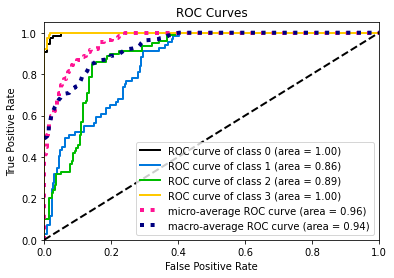

In [13]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

from scikitplot.metrics import plot_roc

plot_roc(y_test, grid.predict_proba(X_test))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

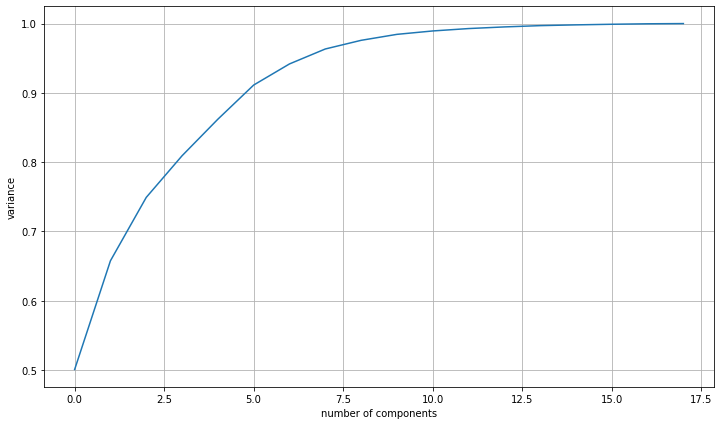

In [14]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

res = []
for n_com in range(1, X_train.shape[1]):
    pca = PCA(n_components=n_com)
    pca.fit_transform(X_train)
    res.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(12, 7))
plt.plot(res)
plt.grid()
plt.xlabel('number of components')
plt.ylabel('variance')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [15]:
### YOUR CODE HERE
# По негласным правилам, начиная с 75%, pca преобразование можно считать достаточно точным
# в таком случае, достаточно будет взять 4 признака

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)

In [16]:
pca.transform(X_test)

array([[-1.7273469 ,  2.13162741,  0.25639621, ..., -1.06079511,
        -0.02766932,  0.46118072],
       [ 0.43490767, -1.74108341,  0.46277756, ..., -0.09751991,
         0.71559439, -0.06533671],
       [-4.77146621, -2.477057  , -0.67981991, ..., -0.18536711,
         0.52197621,  0.3050423 ],
       ...,
       [ 3.4111303 , -1.97694519, -0.45146698, ...,  0.72875268,
        -0.18327704, -0.29225061],
       [-1.53744155, -1.30641084,  1.66416492, ..., -0.56454767,
        -0.03475785, -0.4301858 ],
       [-3.0465574 , -2.55997821, -0.53036418, ...,  0.67825751,
         0.20343973,  0.03942832]])

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [106]:
### YOUR CODE HERE
grid = GridSearchCV(LogisticRegression(), 
                   {'C': [0.1, 0.5, 1, 3, 10, 20, 30, 50, 100],
                   'solver': ['saga'],
                   'tol': [1e-3],
                   'penalty': ['l1', 'l2', 'elasticnet'],
                   'multi_class': ['multinomial']})

grid.fit(X_train_pca, y_train)
print(grid.best_params_)

{'C': 20, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}


In [107]:
print(f'accuracy: {accuracy_score(grid.predict(pca.transform(X_test)), y_test)}')

accuracy: 0.7003367003367004


In [108]:
print('f1_score: {}'.format(f1_score(y_test, grid.predict(pca.transform(X_test)), average=None)))

f1_score: [0.85526316 0.47407407 0.52054795 0.9068323 ]


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

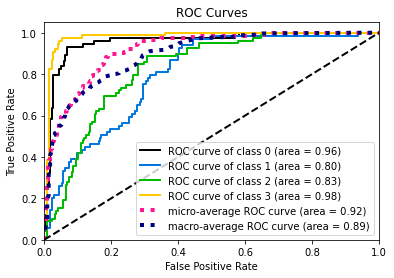

In [109]:
plot_roc(y_test, grid.predict_proba(pca.transform(X_test)))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [110]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
grid = GridSearchCV(DecisionTreeClassifier(),
                   {'max_depth': [5, 10, 15, 20, 25, 35],
                   'criterion': ['gini', 'entropy', 'log_loss']})

{'criterion': 'entropy', 'max_depth': 25}
accuracy: 0.7070707070707071
f1_score: [0.93055556 0.46511628 0.55214724 0.86075949]


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

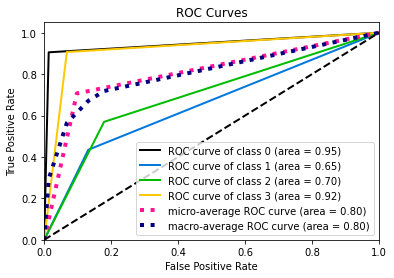

In [111]:
#on not pca data

grid.fit(X_train, y_train)
print(grid.best_params_)
print(f'accuracy: {accuracy_score(grid.predict(X_test), y_test)}')
print('f1_score: {}'.format(f1_score(y_test, grid.predict(X_test), average=None)))
plot_roc(y_test, grid.predict_proba(X_test))

accuracy: 0.6430976430976431
f1_score: [0.86486486 0.45255474 0.44444444 0.79487179]


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

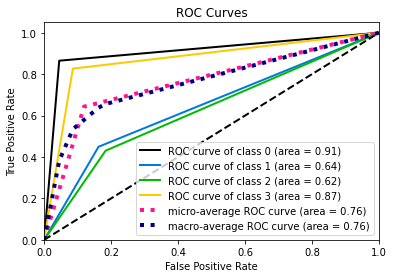

In [112]:
#on pca data

grid.fit(X_train_pca, y_train)
print(f'accuracy: {accuracy_score(grid.predict(pca.transform(X_test)), y_test)}')
print('f1_score: {}'.format(f1_score(y_test, grid.predict(pca.transform(X_test)), average=None)))
plot_roc(y_test, grid.predict_proba(pca.transform(X_test)))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

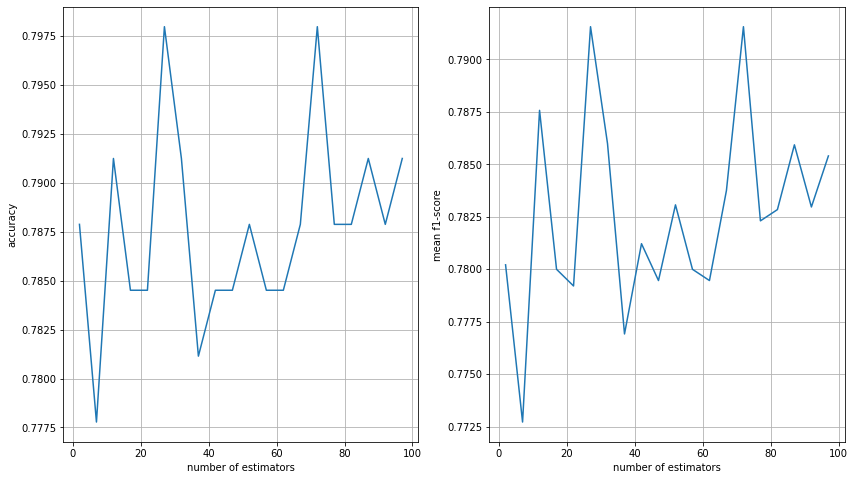

In [100]:
#logistic regression

from sklearn.ensemble import BaggingClassifier
base_estimator_ = LogisticRegression(C = 100, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
number_est = np.arange(2, 101, 5)
accuracies = []
f1s = []

for n in number_est:
    model = BaggingClassifier(base_estimator=base_estimator_, n_estimators=n, bootstrap=True)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies.append(accuracy_score(preds, y_test))
    f1s.append(np.mean(f1_score(preds, y_test, average='macro')))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel(f'number of estimators')
plt.ylabel('accuracy')
plt.plot(number_est, accuracies)

plt.subplot(1, 2, 2)
plt.grid()
plt.xlabel('number of estimators')
plt.ylabel('mean f1-score')
plt.plot(number_est, f1s)

plt.show()

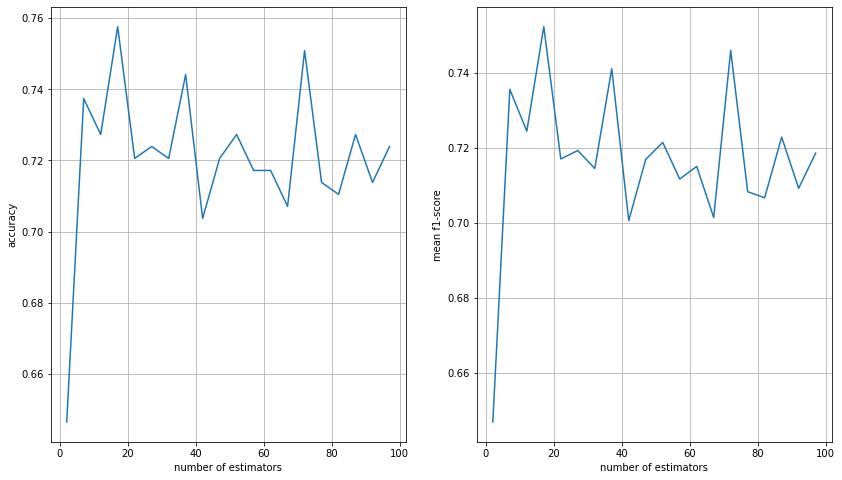

In [114]:
#decision trees

base_estimator_ = DecisionTreeClassifier(criterion='entropy', max_depth=25)
number_est = np.arange(2, 101, 5)
accuracies = []
f1s = []

for n in number_est:
    model = BaggingClassifier(base_estimator=base_estimator_, n_estimators=n, bootstrap=True)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies.append(accuracy_score(preds, y_test))
    f1s.append(np.mean(f1_score(preds, y_test, average='macro')))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel(f'number of estimators')
plt.ylabel('accuracy')
plt.plot(number_est, accuracies)

plt.subplot(1, 2, 2)
plt.grid()
plt.xlabel('number of estimators')
plt.ylabel('mean f1-score')
plt.plot(number_est, f1s)

plt.show()

best number of trees: 17

best number of logreg: 27

we can see when score fluctuates around one value - for logreg immediately, for decision tress - starting with 10 trees, thats why there is no reason to add more estimators in our case

It is not fair to use the same hyperparameter(max_depth) for trees in ensemble as in a single decision tree because a size of  train_data is different for them. Hence, it can lead to overfit for a model in ensemble 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

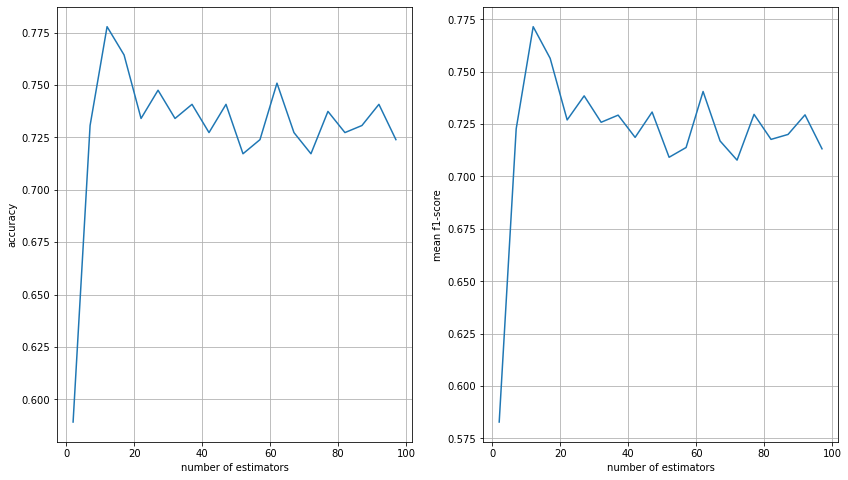

In [117]:
from sklearn.ensemble import RandomForestClassifier

number_est = np.arange(2, 101, 5)
accuracies = []
f1s = []


for n in number_est:
    model = RandomForestClassifier(max_depth=25, n_estimators=n, bootstrap=True)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies.append(accuracy_score(preds, y_test))
    f1s.append(np.mean(f1_score(preds, y_test, average='macro')))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel(f'number of estimators')
plt.ylabel('accuracy')
plt.plot(number_est, accuracies)

plt.subplot(1, 2, 2)
plt.grid()
plt.xlabel('number of estimators')
plt.ylabel('mean f1-score')
plt.plot(number_est, f1s)

plt.show()

best n_estimatords : 17

it can be said that the results are very similar for Bagginc Classifier with decision trees and Random Forest - That might happen because both ensemble models are quite similar 

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

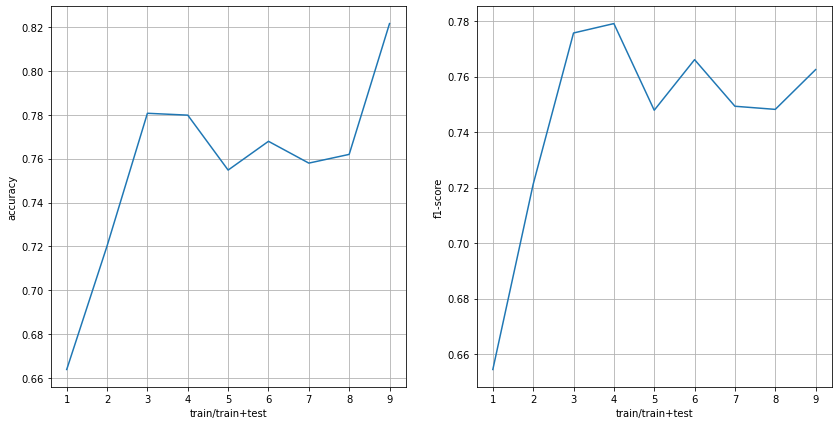

In [120]:
# logistic regression 
all_y = np.hstack((y_train, y_test))
all_X = np.vstack((X_train, X_test))
X = np.split(all_X[:-6], 10)
y = np.split(all_y[:-6], 10)

accuracies = []
f1s = []
lr = LogisticRegression()

for i in range(1, 10):
    X_train_, X_test_ = np.vstack(X[:i]), np.vstack(X[i:])
    y_train_, y_test_ = np.hstack(y[:i]), np.hstack(y[i:])
    lr.fit(X_train_, y_train_)
    preds = lr.predict(X_test_)
    accuracies.append(accuracy_score(preds, y_test_))
    f1s.append(f1_score(preds, y_test_, average='macro'))
    
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('train/train+test')
plt.ylabel('accuracy')
plt.plot(list(range(1, 10)), accuracies)

plt.subplot(1, 2, 2)
plt.grid()
plt.xlabel('train/train+test')
plt.ylabel('f1-score')
plt.plot(list(range(1, 10)), f1s)

plt.show()

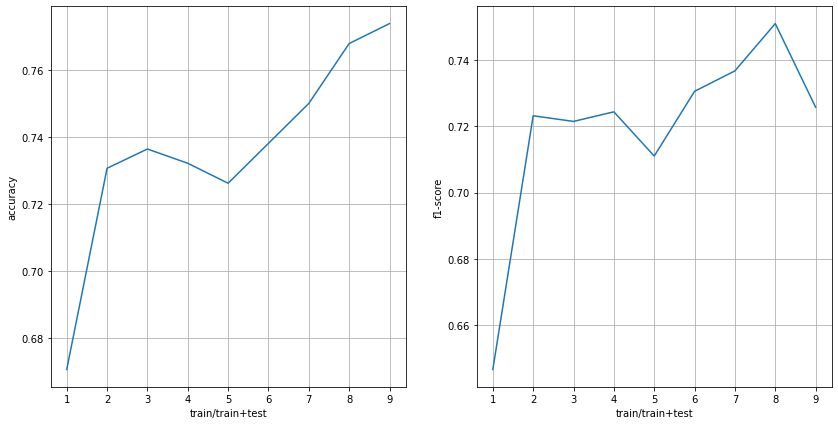

In [123]:
#random forest

model = RandomForestClassifier(max_depth=25, bootstrap=True)
accuracies = []
f1s = []

for i in range(1, 10):
    X_train_, X_test_ = np.vstack(X[:i]), np.vstack(X[i:])
    y_train_, y_test_ = np.hstack(y[:i]), np.hstack(y[i:])
    model.fit(X_train_, y_train_)
    preds = model.predict(X_test_)
    accuracies.append(accuracy_score(preds, y_test_))
    f1s.append(f1_score(preds, y_test_, average='macro'))
    
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('train/train+test')
plt.ylabel('accuracy')
plt.plot(list(range(1, 10)), accuracies)

plt.subplot(1, 2, 2)
plt.grid()
plt.xlabel('train/train+test')
plt.ylabel('f1-score')
plt.plot(list(range(1, 10)), f1s)

plt.show()

CONCLUSION: WE CAN SEE THAT RANDOM FOREST, DESPITE LOGREG, HAS MORE TENDECY FOR OVERFITTING - IT SHOWS BAD RESULTS WHEN TRAIN SIZE IS SMALL